In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
#nltk libraries
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
import string
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_json("/content/drive/MyDrive/Final_Project/reviews_Tools_and_Home_Improvement_5.json.gz", lines=True)
print(df1.shape)
df1.head()

(134476, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A4IL0CLL27Q33,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014"
1,A3Q5W5E7TDVLJF,104800001X,funnyc130,"[0, 0]",These little magnets are really powerful for t...,5,Neat,1369958400,"05 31, 2013"
2,A37KNOJXE2FU6,104800001X,Joseph Yonke II,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,1363132800,"03 13, 2013"
3,A3U4AFML9SZPWK,104800001X,"Leith Tussing ""I like tacos.""","[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,1371340800,"06 16, 2013"
4,A36Y7X194VWVKA,104800001X,Mark D.,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df2 = pd.read_json("/content/drive/MyDrive/Final_Project/reviews_Patio_Lawn_and_Garden_5.json.gz", lines=True)
print(df2.shape)
df2.head()

(13272, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4,Great Hoses,1308614400,"06 21, 2011"
1,A32JCI4AK2JTTG,B00002N674,"Darryl Bennett ""Fuzzy342""","[0, 0]",This is a high quality 8 ply hose. I have had ...,5,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000,"06 9, 2014"
2,A3N0P5AAMP6XD2,B00002N674,H B,"[2, 3]",It's probably one of the best hoses I've ever ...,4,Very satisfied!,1336176000,"05 5, 2012"
3,A2QK7UNJ857YG,B00002N674,Jason,"[0, 0]",I probably should have bought something a bit ...,5,Very high quality,1373846400,"07 15, 2013"
4,AS0CYBAN6EM06,B00002N674,jimmy,"[1, 1]",I bought three of these 5/8-inch Flexogen hose...,5,Good Hoses,1375660800,"08 5, 2013"


In [ ]:
df3= pd.read_csv('/content/drive/MyDrive/Final_Project/ratings_Tools_and_Home_Improvement.csv', header=None)
df3.columns=['userID','productID','rating','timestamp']
df3.head()

,userID,productID,rating,timestamp
0,A15I9QV4OG22A6,001212835X,5.0,1389657600
1,A1BNZ90HN39TYR,0205062040,5.0,1373846400
2,A9DUCBTL8K3E4,0205062040,5.0,1382659200
3,AA8O583KRYINX,0205062040,5.0,1372723200
4,A16CR5RCPXFMMA,0205062040,4.0,1364256000


In [ ]:
df4= pd.read_csv('/content/drive/MyDrive/Final_Project/ratings_Patio_Lawn_and_Garden.csv', header=None)
df4.columns=['userID','productID','rating','timestamp']
df4.head()

,userID,productID,rating,timestamp
0,A2VNYWOPJ13AFP,0981850006,5.0,1259798400
1,A20DWVV8HML3AW,0981850006,5.0,1371081600
2,A3RVP3YBYYOPRH,0981850006,5.0,1257984000
3,A28XY55TP3Q90O,0981850006,5.0,1314144000
4,A3VZW1BGUQO0V3,0981850006,5.0,1308268800


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      13272 non-null  object
 1   asin            13272 non-null  object
 2   reviewerName    13107 non-null  object
 3   helpful         13272 non-null  object
 4   reviewText      13272 non-null  object
 5   overall         13272 non-null  int64 
 6   summary         13272 non-null  object
 7   unixReviewTime  13272 non-null  int64 
 8   reviewTime      13272 non-null  object
dtypes: int64(2), object(7)
memory usage: 933.3+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      13272 non-null  object
 1   asin            13272 non-null  object
 2   reviewerName    13107 non-null  object
 3   helpful         13272 non-null  object
 4   reviewText      13272 non-null  object
 5   overall         13272 non-null  int64 
 6   summary         13272 non-null  object
 7   unixReviewTime  13272 non-null  int64 
 8   reviewTime      13272 non-null  object
dtypes: int64(2), object(7)
memory usage: 933.3+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926047 entries, 0 to 1926046
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 58.8+ MB


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993490 entries, 0 to 993489
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userID     993490 non-null  object 
 1   productID  993490 non-null  object 
 2   rating     993490 non-null  float64
 3   timestamp  993490 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 30.3+ MB


# Checking and removing null values

In [ ]:
df1.isnull().sum()

reviewerID          0
asin                0
reviewerName      719
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [ ]:
df1=df1.dropna()

In [ ]:
df2.isnull().sum()

reviewerID          0
asin                0
reviewerName      165
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [ ]:
df2=df2.dropna()

In [ ]:
df3.isnull().sum()

userID       0
productID    0
rating       0
timestamp    0
dtype: int64

In [ ]:
df4.isnull().sum()

userID       0
productID    0
rating       0
timestamp    0
dtype: int64

In [ ]:
print(df1.shape)

(133757, 9)


In [ ]:
print(df2.shape)

(13107, 9)


# Converting ReviewTime into Date-Time format

In [ ]:
df1['ReviewDate'] = pd.to_datetime(df1.unixReviewTime, unit='s')
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,ReviewDate
0,A4IL0CLL27Q33,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014",2014-01-29
1,A3Q5W5E7TDVLJF,104800001X,funnyc130,"[0, 0]",These little magnets are really powerful for t...,5,Neat,1369958400,"05 31, 2013",2013-05-31
2,A37KNOJXE2FU6,104800001X,Joseph Yonke II,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,1363132800,"03 13, 2013",2013-03-13
3,A3U4AFML9SZPWK,104800001X,"Leith Tussing ""I like tacos.""","[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,1371340800,"06 16, 2013",2013-06-16
4,A36Y7X194VWVKA,104800001X,Mark D.,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013",2013-08-09


In [ ]:
df2['ReviewDate'] = pd.to_datetime(df2.unixReviewTime, unit='s')
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,ReviewDate
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4,Great Hoses,1308614400,"06 21, 2011",2011-06-21
1,A32JCI4AK2JTTG,B00002N674,"Darryl Bennett ""Fuzzy342""","[0, 0]",This is a high quality 8 ply hose. I have had ...,5,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000,"06 9, 2014",2014-06-09
2,A3N0P5AAMP6XD2,B00002N674,H B,"[2, 3]",It's probably one of the best hoses I've ever ...,4,Very satisfied!,1336176000,"05 5, 2012",2012-05-05
3,A2QK7UNJ857YG,B00002N674,Jason,"[0, 0]",I probably should have bought something a bit ...,5,Very high quality,1373846400,"07 15, 2013",2013-07-15
4,AS0CYBAN6EM06,B00002N674,jimmy,"[1, 1]",I bought three of these 5/8-inch Flexogen hose...,5,Good Hoses,1375660800,"08 5, 2013",2013-08-05


In [ ]:
df3['RatingDate'] = pd.to_datetime(df3.timestamp, unit='s')
df3.head()

,userID,productID,rating,timestamp,RatingDate
0,A15I9QV4OG22A6,001212835X,5.0,1389657600,2014-01-14
1,A1BNZ90HN39TYR,0205062040,5.0,1373846400,2013-07-15
2,A9DUCBTL8K3E4,0205062040,5.0,1382659200,2013-10-25
3,AA8O583KRYINX,0205062040,5.0,1372723200,2013-07-02
4,A16CR5RCPXFMMA,0205062040,4.0,1364256000,2013-03-26


In [ ]:
df4['RatingDate'] = pd.to_datetime(df4.timestamp, unit='s')
df4.head()

,userID,productID,rating,timestamp,RatingDate
0,A2VNYWOPJ13AFP,0981850006,5.0,1259798400,2009-12-03
1,A20DWVV8HML3AW,0981850006,5.0,1371081600,2013-06-13
2,A3RVP3YBYYOPRH,0981850006,5.0,1257984000,2009-11-12
3,A28XY55TP3Q90O,0981850006,5.0,1314144000,2011-08-24
4,A3VZW1BGUQO0V3,0981850006,5.0,1308268800,2011-06-17


In [ ]:
#import datetime as dt
df1['Year'] = df1['ReviewDate'].dt.year
df2['Year'] = df2['ReviewDate'].dt.year
df3['Year'] = df3['RatingDate'].dt.year
df4['Year'] = df4['RatingDate'].dt.year

df1['Month'] = df1['ReviewDate'].dt.month
df2['Month'] = df2['ReviewDate'].dt.month
df3['Month'] = df3['RatingDate'].dt.month
df4['Month'] = df4['RatingDate'].dt.month

In [ ]:
df1.rename(columns={'reviewerID':'UserId', 'asin':'ProductId', 'reviewText':'OGText','overall':'Score', 'summary':'Summary', 'unixReviewTime':'Time'}, inplace=True)
df1.head()

,UserId,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month
0,A4IL0CLL27Q33,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014",2014-01-29,2014,1
1,A3Q5W5E7TDVLJF,104800001X,funnyc130,"[0, 0]",These little magnets are really powerful for t...,5,Neat,1369958400,"05 31, 2013",2013-05-31,2013,5
2,A37KNOJXE2FU6,104800001X,Joseph Yonke II,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,1363132800,"03 13, 2013",2013-03-13,2013,3
3,A3U4AFML9SZPWK,104800001X,"Leith Tussing ""I like tacos.""","[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,1371340800,"06 16, 2013",2013-06-16,2013,6
4,A36Y7X194VWVKA,104800001X,Mark D.,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013",2013-08-09,2013,8


In [ ]:
df1['Category']= 'Tools'
df3['Category']= 'Tools'

In [ ]:
df2.rename(columns={'reviewerID':'UserId', 'asin':'ProductId', 'reviewText':'OGText','overall':'Score', 'summary':'Summary', 'unixReviewTime':'Time'}, inplace=True)
df2.head()

,UserId,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4,Great Hoses,1308614400,"06 21, 2011",2011-06-21,2011,6
1,A32JCI4AK2JTTG,B00002N674,"Darryl Bennett ""Fuzzy342""","[0, 0]",This is a high quality 8 ply hose. I have had ...,5,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000,"06 9, 2014",2014-06-09,2014,6
2,A3N0P5AAMP6XD2,B00002N674,H B,"[2, 3]",It's probably one of the best hoses I've ever ...,4,Very satisfied!,1336176000,"05 5, 2012",2012-05-05,2012,5
3,A2QK7UNJ857YG,B00002N674,Jason,"[0, 0]",I probably should have bought something a bit ...,5,Very high quality,1373846400,"07 15, 2013",2013-07-15,2013,7
4,AS0CYBAN6EM06,B00002N674,jimmy,"[1, 1]",I bought three of these 5/8-inch Flexogen hose...,5,Good Hoses,1375660800,"08 5, 2013",2013-08-05,2013,8


In [ ]:
df2['Category']= 'Garden'
df4['Category']= 'Garden'

In [ ]:
reviews=pd.concat([df1,df2])
reviews

,UserId,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month,Category
0,A4IL0CLL27Q33,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014",2014-01-29,2014,1,Tools
1,A3Q5W5E7TDVLJF,104800001X,funnyc130,"[0, 0]",These little magnets are really powerful for t...,5,Neat,1369958400,"05 31, 2013",2013-05-31,2013,5,Tools
2,A37KNOJXE2FU6,104800001X,Joseph Yonke II,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,1363132800,"03 13, 2013",2013-03-13,2013,3,Tools
3,A3U4AFML9SZPWK,104800001X,"Leith Tussing ""I like tacos.""","[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,1371340800,"06 16, 2013",2013-06-16,2013,6,Tools
4,A36Y7X194VWVKA,104800001X,Mark D.,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013",2013-08-09,2013,8,Tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,AT53ZTTO707MB,B00KS0F4FI,I Do The Speed Limit,"[1, 2]",Simple. Perfect. Plenty big enough. Durable...,5,Great pair of claws,1403827200,"06 27, 2014",2014-06-27,2014,6,Garden
13268,AYB4ELCS5AM8P,B00KS0F4FI,"John B. Goode ""JBG""","[0, 0]",These claws are fantastic. They are made of ha...,5,Sharp...,1405123200,"07 12, 2014",2014-07-12,2014,7,Garden
13269,AZMY6E8B52L2T,B00KS0F4FI,"JP ""J.P.""","[1, 3]",I really like theseOuddy Heat Resistant Meat C...,5,Really Helpful...,1405123200,"07 12, 2014",2014-07-12,2014,7,Garden
13270,AEC90GPFKLAAW,B00KS0F4FI,"Lisa Kearns ""Lisa Kearns""","[0, 0]",I make pulled pork in the crock pot pretty oft...,5,Shreds meat perfectly!,1405468800,"07 16, 2014",2014-07-16,2014,7,Garden


In [ ]:
reviews.drop(['reviewerName','Time','reviewTime','reviewerName'], axis=1, inplace=True)
reviews.head()

,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Year,Month,Category
0,A4IL0CLL27Q33,104800001X,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,2014-01-29,2014,1,Tools
1,A3Q5W5E7TDVLJF,104800001X,"[0, 0]",These little magnets are really powerful for t...,5,Neat,2013-05-31,2013,5,Tools
2,A37KNOJXE2FU6,104800001X,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,2013-03-13,2013,3,Tools
3,A3U4AFML9SZPWK,104800001X,"[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,2013-06-16,2013,6,Tools
4,A36Y7X194VWVKA,104800001X,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,2013-08-09,2013,8,Tools


In [ ]:
ratings=pd.concat([df3,df4])
ratings

,userID,productID,rating,timestamp,RatingDate,Year,Month,Category
0,A15I9QV4OG22A6,001212835X,5.0,1389657600,2014-01-14,2014,1,Tools
1,A1BNZ90HN39TYR,0205062040,5.0,1373846400,2013-07-15,2013,7,Tools
2,A9DUCBTL8K3E4,0205062040,5.0,1382659200,2013-10-25,2013,10,Tools
3,AA8O583KRYINX,0205062040,5.0,1372723200,2013-07-02,2013,7,Tools
4,A16CR5RCPXFMMA,0205062040,4.0,1364256000,2013-03-26,2013,3,Tools
...,...,...,...,...,...,...,...,...
993485,A2G7RZI15ZPCTH,B00LW2Z4NS,5.0,1405641600,2014-07-18,2014,7,Garden
993486,A2V247ZQT9OJIT,B00LW2Z4NS,5.0,1405900800,2014-07-21,2014,7,Garden
993487,AF30DHAVSYNZ0,B00LW2Z4NS,5.0,1405641600,2014-07-18,2014,7,Garden
993488,A34KTJ4VWNBOHI,B00LW2Z4NS,5.0,1405900800,2014-07-21,2014,7,Garden


In [ ]:
ratings.drop(['timestamp'], axis=1, inplace=True)
ratings

,userID,productID,rating,RatingDate,Year,Month,Category
0,A15I9QV4OG22A6,001212835X,5.0,2014-01-14,2014,1,Tools
1,A1BNZ90HN39TYR,0205062040,5.0,2013-07-15,2013,7,Tools
2,A9DUCBTL8K3E4,0205062040,5.0,2013-10-25,2013,10,Tools
3,AA8O583KRYINX,0205062040,5.0,2013-07-02,2013,7,Tools
4,A16CR5RCPXFMMA,0205062040,4.0,2013-03-26,2013,3,Tools
...,...,...,...,...,...,...,...
993485,A2G7RZI15ZPCTH,B00LW2Z4NS,5.0,2014-07-18,2014,7,Garden
993486,A2V247ZQT9OJIT,B00LW2Z4NS,5.0,2014-07-21,2014,7,Garden
993487,AF30DHAVSYNZ0,B00LW2Z4NS,5.0,2014-07-18,2014,7,Garden
993488,A34KTJ4VWNBOHI,B00LW2Z4NS,5.0,2014-07-21,2014,7,Garden


In [ ]:
#reviews.to_csv('reviews.csv')
#ratings.to_csv('ratings.csv')

# Text Preprocessing

In [ ]:
nltk.download('stopwords')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
protext = reviews['OGText'].str.replace('[^\w\s]','').str.replace('[\d+]','').str.replace('<.*?>','')

In [ ]:
protext

0        I hate it when my shirt collars not otherwise ...
1        These little magnets are really powerful for t...
2        I wanted something this small to mount on the ...
3        I use these to magnetize my Warhammer K miniat...
4        They are soo freaking annoying  Why You spend ...
                               ...                        
13267    Simple  Perfect  Plenty big enough  Durable an...
13268    These claws are fantastic They are made of har...
13269    I really like theseOuddy Heat Resistant Meat C...
13270    I make pulled pork in the crock pot pretty oft...
13271    When I first saw these I thought Hmmm Wonder i...
Name: OGText, Length: 146864, dtype: object

In [ ]:
protext = protext.str.lower()

In [ ]:
protext = protext.str.split()

In [ ]:
protext = protext.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
def lemmatize_text(text_list):
    return [lemmatizer.lemmatize(w) for w in text_list]

In [ ]:
import nltk
# nltk.download('omw-1.4')

In [ ]:
# nltk.download('wordnet')

In [ ]:
nltk.download('wordnet')
protext = protext.apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
protext['preprocessed_review'] = protext.apply(' '.join)

In [ ]:
protext

0                      [hate, shirt, collar, otherwise, secured, plac...
1                      [little, magnet, really, powerful, size, using...
2                      [wanted, something, small, mount, back, filagr...
3                      [use, magnetize, warhammer, k, miniature, toge...
4                      [soo, freaking, annoying, spend, time, dan, ne...
                                             ...                        
13268                  [claw, fantastic, made, hard, sturdy, plastic,...
13269                  [really, like, theseouddy, heat, resistant, me...
13270                  [make, pulled, pork, crock, pot, pretty, often...
13271                  [first, saw, thought, hmmm, wonder, theyre, le...
preprocessed_review    0        hate shirt collar otherwise secured p...
Name: OGText, Length: 146865, dtype: object

In [ ]:
reviews['ProText'] = protext['preprocessed_review']

In [ ]:
print(reviews.shape)
reviews.head()

(146864, 11)


,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Year,Month,Category,ProText
0,A4IL0CLL27Q33,104800001X,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,2014-01-29,2014,1,Tools,hate shirt collar otherwise secured place butt...
1,A3Q5W5E7TDVLJF,104800001X,"[0, 0]",These little magnets are really powerful for t...,5,Neat,2013-05-31,2013,5,Tools,little magnet really powerful size using make ...
2,A37KNOJXE2FU6,104800001X,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,2013-03-13,2013,3,Tools,wanted something small mount back filagree woo...
3,A3U4AFML9SZPWK,104800001X,"[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,2013-06-16,2013,6,Tools,use magnetize warhammer k miniature together a...
4,A36Y7X194VWVKA,104800001X,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,2013-08-09,2013,8,Tools,soo freaking annoying spend time dan near brea...


In [ ]:
new = pd.DataFrame([list(x) for x in reviews['helpful']])
# print(new)
new1 = pd.DataFrame(new)
new1.columns=['Helpfull','Not Helpfull']
new1

,Helpfull,Not Helpfull
0,0,1
1,0,0
2,0,0
3,0,0
4,23,25
...,...,...
146859,1,2
146860,0,0
146861,1,3
146862,0,0


In [ ]:
Helpfull = np.array(new1['Helpfull'])
Helpfull

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
not_help = np.array(new1['Not Helpfull'])
not_help

array([1, 0, 0, ..., 3, 0, 2])

In [ ]:
reviews['Helpfull'] = Helpfull
reviews['Not Helpfull'] = not_help

In [ ]:
reviews.head()

,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Year,Month,Category,ProText,Helpfull,Not Helpfull
0,A4IL0CLL27Q33,104800001X,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,2014-01-29,2014,1,Tools,hate shirt collar otherwise secured place butt...,0,1
1,A3Q5W5E7TDVLJF,104800001X,"[0, 0]",These little magnets are really powerful for t...,5,Neat,2013-05-31,2013,5,Tools,little magnet really powerful size using make ...,0,0
2,A37KNOJXE2FU6,104800001X,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,2013-03-13,2013,3,Tools,wanted something small mount back filagree woo...,0,0
3,A3U4AFML9SZPWK,104800001X,"[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,2013-06-16,2013,6,Tools,use magnetize warhammer k miniature together a...,0,0
4,A36Y7X194VWVKA,104800001X,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,2013-08-09,2013,8,Tools,soo freaking annoying spend time dan near brea...,23,25


# Sentiment Analysis

In [ ]:
# !pip install textblob

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity

reviews['Polarity'] = reviews['ProText'].apply(pol)
reviews.head()

,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Year,Month,Category,ProText,Helpfull,Not Helpfull,Polarity
0,A4IL0CLL27Q33,104800001X,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,2014-01-29,2014,1,Tools,hate shirt collar otherwise secured place butt...,0,1,-0.200000
1,A3Q5W5E7TDVLJF,104800001X,"[0, 0]",These little magnets are really powerful for t...,5,Neat,2013-05-31,2013,5,Tools,little magnet really powerful size using make ...,0,0,-0.095833
2,A37KNOJXE2FU6,104800001X,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,2013-03-13,2013,3,Tools,wanted something small mount back filagree woo...,0,0,0.083333
3,A3U4AFML9SZPWK,104800001X,"[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,2013-06-16,2013,6,Tools,use magnetize warhammer k miniature together a...,0,0,0.287500
4,A36Y7X194VWVKA,104800001X,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,2013-08-09,2013,8,Tools,soo freaking annoying spend time dan near brea...,23,25,-0.077778


In [ ]:
reviews.loc[reviews["Polarity"] < 0, "Sentiment"] = "Negative"
reviews.loc[reviews["Polarity"] > 0, "Sentiment"] = "Positive"
reviews.loc[reviews["Polarity"] == 0, "Sentiment"] = "Neutral"

In [ ]:
reviews.head()

,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Year,Month,Category,ProText,Helpfull,Not Helpfull,Polarity,Sentiment
0,A4IL0CLL27Q33,104800001X,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,2014-01-29,2014,1,Tools,hate shirt collar otherwise secured place butt...,0,1,-0.200000,Negative
1,A3Q5W5E7TDVLJF,104800001X,"[0, 0]",These little magnets are really powerful for t...,5,Neat,2013-05-31,2013,5,Tools,little magnet really powerful size using make ...,0,0,-0.095833,Negative
2,A37KNOJXE2FU6,104800001X,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,2013-03-13,2013,3,Tools,wanted something small mount back filagree woo...,0,0,0.083333,Positive
3,A3U4AFML9SZPWK,104800001X,"[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,2013-06-16,2013,6,Tools,use magnetize warhammer k miniature together a...,0,0,0.287500,Positive
4,A36Y7X194VWVKA,104800001X,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,2013-08-09,2013,8,Tools,soo freaking annoying spend time dan near brea...,23,25,-0.077778,Negative


In [ ]:
#reviews.to_csv('reviewsTools.csv')

Positive    130578
Negative     13186
Neutral       3100
Name: Sentiment, dtype: int64


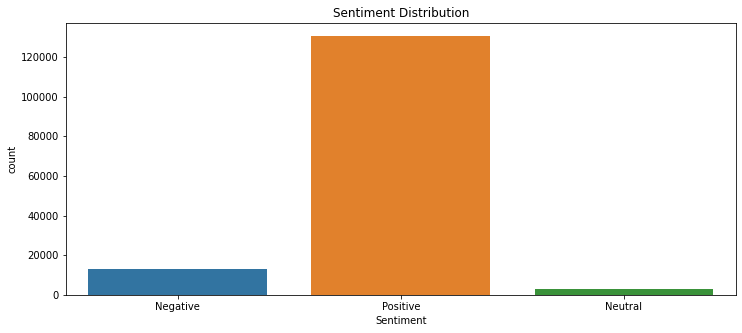

In [ ]:
data = reviews['Sentiment'].value_counts()
print(data)

plt.figure(figsize=(12,5))

sns.countplot(reviews['Sentiment'])
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
# reviews.to_csv('reviews1.csv')

In [ ]:
pos = reviews[reviews['Sentiment']=='Positive']
pos.head(2)

,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Year,Month,Category,ProText,Helpfull,Not Helpfull,Polarity,Sentiment
2,A37KNOJXE2FU6,104800001X,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,2013-03-13,2013,3,Tools,wanted something small mount back filagree woo...,0,0,0.083333,Positive
3,A3U4AFML9SZPWK,104800001X,"[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,2013-06-16,2013,6,Tools,use magnetize warhammer k miniature together a...,0,0,0.287500,Positive


In [ ]:
pos1 = pos.iloc[0,3]
pos1

'I wanted something this small to mount on the back of filagree wood piece I cut. They could then be mounted on refrigerators. Works well. Should be able to remove the pieces from the refrig without breaking yet will hold well.'

In [ ]:
pos1 = pos.iloc[1,3]
pos1

'I use these to magnetize my Warhammer 40K miniatures together allowing me to swap out their various parts and weapons.  They provide excellent holding power along with small size to fit in snug areas.'

In [ ]:
neg = reviews[reviews['Sentiment']=='Negative']
neg.head(2)

,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Year,Month,Category,ProText,Helpfull,Not Helpfull,Polarity,Sentiment
0,A4IL0CLL27Q33,104800001X,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,2014-01-29,2014,1,Tools,hate shirt collar otherwise secured place butt...,0,1,-0.200000,Negative
1,A3Q5W5E7TDVLJF,104800001X,"[0, 0]",These little magnets are really powerful for t...,5,Neat,2013-05-31,2013,5,Tools,little magnet really powerful size using make ...,0,0,-0.095833,Negative


In [ ]:
neg1 = neg.iloc[0,3]
neg1

'I hate it when my shirt collars, not otherwise secured in place by buttons, end up in weird places throughout the day. I purchased some steel collar stays to use with these magnets but they were only vaguely magnetic. I ended up using 2 of these magnets - one in the collar with the stay and the other inside my shirt, to lock my collar in place. They work flawlessly. They are the perfect size, and there are plenty of magnets in case you forget to remove them at the end of the day.'

In [ ]:
neg1 = neg.iloc[1,3]
neg1

'These little magnets are really powerful for there size. I am using them to make secret compartments in custom made boxes. Each one hols about .8 of a pound.'

In [ ]:
neu = reviews[reviews['Sentiment']=='Neutral']
neu.head(2)

,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Year,Month,Category,ProText,Helpfull,Not Helpfull,Polarity,Sentiment
44,AHGDSZCD88EIQ,7109080609,"[0, 0]",These seem abnormally sized for the type of fi...,2,"Usable, but don't fit well. Have to be modified.",2013-12-08,2013,12,Tools,seem abnormally sized type fixture theyre supp...,0,0,0.0,Neutral
142,A10M80TOC4LFW7,B0000222V9,"[0, 0]",I have used this guide a few times since its p...,4,does the job,2011-04-21,2011,4,Tools,used guide time since purchase find quite sati...,0,0,0.0,Neutral


In [ ]:
neu1= neu.iloc[75,3]
neu1

"For the most part the assembly went well until I came to install the pins in  the 2 crank shafts.  I just couldn't be done.  So I resolved buying 1/8x24 hardware bolts to substitute for the pins; However, I had to drill out the plastic and steel shaft to accommodate the #8 hardware I used.  other than that, things are proceeding.  At this point I have mixed reactions."

In [ ]:
neu1= neu.iloc[21,3]
neu1

'This item does what it is supposed to do.  It about eliminates blade wobble.'

**Tools Review**

In [ ]:
#nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
res={}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
  text=row['OGText']
  id= row[0]
  res[id] = sia.polarity_scores(text)

  0%|          | 0/133757 [00:00<?, ?it/s]

In [ ]:
rew1= pd.DataFrame(res).T

rew1= rew1.reset_index().rename(columns={'index':'UserId'})
rew1=rew1.merge(df1, how= 'left')

In [ ]:
rew1.head()

,UserId,neg,neu,pos,compound,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month,Category
0,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014",2014-01-29,2014,1,Tools
1,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,B0009I8ANM,D. Brennan,"[1, 3]",I purchased this product along with aDelta Da ...,3,This product does exactly what it says it will...,1337904000,"05 25, 2012",2012-05-25,2012,5,Tools
2,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,B000FD8MMU,D. Brennan,"[3, 3]",I have owned a Leatherman since the first gene...,5,Awesome. There is a bit of a learning curve.,1389916800,"01 17, 2014",2014-01-17,2014,1,Tools
3,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,B000U39UJE,D. Brennan,"[0, 0]",First -this is NOT a device that you simply pl...,3,Please note that you must wire this directly i...,1351728000,"11 1, 2012",2012-11-01,2012,11,Tools
4,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,B001CEAMCY,D. Brennan,"[43, 45]",I used this product last night to cut 100 pape...,5,Does its job perfectly.,1267056000,"02 25, 2010",2010-02-25,2010,2,Tools


In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity

rew1['Polarity'] = rew1['OGText'].apply(pol)
rew1.head()

,UserId,neg,neu,pos,compound,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month,Category,Polarity
0,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014",2014-01-29,2014,1,Tools,0.010714
1,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,B0009I8ANM,D. Brennan,"[1, 3]",I purchased this product along with aDelta Da ...,3,This product does exactly what it says it will...,1337904000,"05 25, 2012",2012-05-25,2012,5,Tools,0.156863
2,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,B000FD8MMU,D. Brennan,"[3, 3]",I have owned a Leatherman since the first gene...,5,Awesome. There is a bit of a learning curve.,1389916800,"01 17, 2014",2014-01-17,2014,1,Tools,0.129628
3,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,B000U39UJE,D. Brennan,"[0, 0]",First -this is NOT a device that you simply pl...,3,Please note that you must wire this directly i...,1351728000,"11 1, 2012",2012-11-01,2012,11,Tools,0.017063
4,A4IL0CLL27Q33,0.049,0.868,0.083,0.7717,B001CEAMCY,D. Brennan,"[43, 45]",I used this product last night to cut 100 pape...,5,Does its job perfectly.,1267056000,"02 25, 2010",2010-02-25,2010,2,Tools,0.060833


In [ ]:
most_negative =rew1[(rew1.Polarity <= -.001)&(rew1.Score<3)]
print(most_negative) 

                UserId    neg    neu    pos  compound   ProductId  \
387     A3UKPBTB65LLH6  0.000  0.829  0.171    0.9814  B000LWMRTO   
393     A3UKPBTB65LLH6  0.000  0.829  0.171    0.9814  B005W17HYY   
410      AYJUBKUE2OJFM  0.115  0.792  0.093   -0.3658  B0009RWK52   
456      APNX875EY1FI1  0.026  0.762  0.213    0.9604  B004Q1V4OU   
555     A11GETCXA7UX9C  0.000  0.807  0.193    0.9403  B000I7MANA   
...                ...    ...    ...    ...       ...         ...   
133110  A1X244QTQDFT49  0.000  0.921  0.079    0.3384  B0062RBR84   
133197   AAKSRYDMJVMO0  0.055  0.774  0.171    0.9177  B0062RBR84   
133326   AQ1TM4QHTWKYE  0.045  0.815  0.140    0.7150  B0064AE2K4   
133472  A2HBMRT4U5G7S3  0.040  0.721  0.240    0.9274  B0092Q1N7W   
133501  A3VG3YEKN0LLOE  0.168  0.763  0.069   -0.4445  B008RIIGX0   

             reviewerName helpful  \
387         John Anderson  [0, 0]   
393         John Anderson  [0, 1]   
410               J. Rice  [8, 8]   
456                   T

In [ ]:
most_negative.shape

(2639, 18)

In [ ]:
rev1 = most_negative.sort_values("Polarity")
rev1.head(10)

,UserId,neg,neu,pos,compound,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month,Category,Polarity
88192,A2AX9C569CKHOJ,0.049,0.789,0.161,0.9466,B0002BBZ2Y,Kristin The Boss,"[1, 1]",I bought this for model making. It just isn't ...,2,Wanted to like this,1376352000,"08 13, 2013",2013-08-13,2013,8,Tools,-1.0000
25640,A4YV49T8Y0X94,0.182,0.818,0.000,-0.6542,B00CWKTAV6,"RobbyB ""RobbyB""","[1, 1]",It leaks from the gauge. Leaks real bad. I t...,1,Leaks bad,1388793600,"01 4, 2014",2014-01-04,2014,1,Tools,-1.0000
121195,A1O02F1EBW7QS1,0.099,0.901,0.000,-0.5913,B0030ZM6JK,NANCY76530,"[0, 0]",Very disappointed. I can't tell you if this w...,2,Keys were not included,1403049600,"06 18, 2014",2014-06-18,2014,6,Tools,-0.9750
30630,A3AY333WHF4H3E,0.035,0.847,0.117,0.7343,B000BQU5QW,Russell Johnson,"[0, 0]","I was very disappointed with this product, I h...",2,door closer,1395014400,"03 17, 2014",2014-03-17,2014,3,Tools,-0.9750
125958,A185KIXEY9QZRQ,0.000,0.458,0.542,0.9571,B001LJKLT4,Caminante583,"[1, 1]","we did not like this product at all, because i...",1,not good,1361232000,"02 19, 2013",2013-02-19,2013,2,Tools,-0.9100
92259,A19MFKHOPMC88B,0.000,0.580,0.420,0.9190,B000BD6CQW,dennis,"[0, 2]",terrible design cant believe i put a hole in m...,1,cheap junk,1393286400,"02 25, 2014",2014-02-25,2014,2,Tools,-0.8500
3227,ABPP6J9PWJ25O,0.090,0.744,0.165,0.4299,B000R6TW24,"Mike Curl aka RedonKiLaus ""Redonkilaus""","[1, 5]",KD tools ... nut driver ... very expensive - n...,2,Not Made in USA,1299283200,"03 5, 2011",2011-03-05,2011,3,Tools,-0.8125
62409,A2STOU4BKE3WUQ,0.020,0.951,0.028,0.1999,B003VPMJGE,"R.H. ""R H""","[0, 1]",This has got to be the worst cutting blade I h...,1,Terriable,1323734400,"12 13, 2011",2011-12-13,2011,12,Tools,-0.8000
51503,A3LKEPMO0PAOI3,0.129,0.827,0.044,-0.9281,B00004T17L,"J. Thomas ""jimmyjames8""","[1, 3]",Mine says Balck and Decker on it and is a piec...,1,power shot you in the foot,1213056000,"06 10, 2008",2008-06-10,2008,6,Tools,-0.8000
45922,A93SRU78HLB2P,0.112,0.857,0.031,-0.8158,B00004R9LF,"Liz-ard ""person""","[0, 1]",This bagger is worthless uless you want a lot ...,1,Worthless dust bagger,1304121600,"04 30, 2011",2011-04-30,2011,4,Tools,-0.8000


In [ ]:
rev1['OGText'][88192]

"I bought this for model making. It just isn't stable. It flops over and the clips are terrible and just don't hold on to anything. I need to replace this with something stronger and sturdier."

In [ ]:
rev1['OGText'][25640]

'It leaks from the gauge.  Leaks real bad.  I tried Teflon tape but leak appears to be coming from gauge itself. I could not use it at all.'

In [ ]:
rev1['OGText'][121195]

"Very disappointed.  I can't tell you if this works or not because the keys were not included in the box."

In [ ]:
rev1['OGText'][30630]

'I was very disappointed with this product, I have 2 installed on the screen door, and when the wind jerked it out of my daughters hand, the shaft bent on one of them'

In [ ]:
rev1['OGText'][125958]

'we did not like this product at all, because is a joke, it doesnt work, very bad quality, oufull so we never buy this again, i don{t recomend it to anyone, please dont buy trash'

**Reasons**

1. Poor Quality product
2. Leakage in Product
3. Poor built 
4. Items missing
5. Bad Quality and not working

**Products**

1. Cutting Blade
2. Alarm
3. Table saw
4. Motor
5. Nut driver

**Garden Review**

In [ ]:
res1={}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
  text=row['OGText']
  id= row[0]
  res1[id] = sia.polarity_scores(text)

  0%|          | 0/13107 [00:00<?, ?it/s]

In [ ]:
rew2= pd.DataFrame(res1).T

rew2= rew2.reset_index().rename(columns={'index':'UserId'})
rew2=rew2.merge(df2, how= 'left')

In [ ]:
rew2.head()

,UserId,neg,neu,pos,compound,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month,Category
0,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4,Great Hoses,1308614400,"06 21, 2011",2011-06-21,2011,6,Garden
1,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B000MOM7KK,"Carter H ""1amazonreviewer@gmail . com""","[1, 1]",This is an ok quality skimmer. Like several ha...,4,Ok For The Price - Won't Last As Long As Old M...,1403913600,"06 28, 2014",2014-06-28,2014,6,Garden
2,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B000NSGNOG,"Carter H ""1amazonreviewer@gmail . com""","[1, 1]",This is a great product if you are like me and...,5,Water feels better without un natural chemicals,1404172800,"07 1, 2014",2014-07-01,2014,7,Garden
3,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B00107039U,"Carter H ""1amazonreviewer@gmail . com""","[1, 1]",This is your basic kit. Nothing special. Tells...,3,Just So You Know Amazon Doesn't Allow Returns ...,1403913600,"06 28, 2014",2014-06-28,2014,6,Garden
4,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B00602J3V4,"Carter H ""1amazonreviewer@gmail . com""","[1, 1]",This is one great weedeater. I have gotten to ...,5,Light And Powerful Cordless To Attack Your Wee...,1404345600,"07 3, 2014",2014-07-03,2014,7,Garden


In [ ]:
from textblob import TextBlob

pol1 = lambda x: TextBlob(x).sentiment.polarity

rew2['Polarity'] = rew2['OGText'].apply(pol1)
rew2.head()

,UserId,neg,neu,pos,compound,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month,Category,Polarity
0,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4,Great Hoses,1308614400,"06 21, 2011",2011-06-21,2011,6,Garden,0.032071
1,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B000MOM7KK,"Carter H ""1amazonreviewer@gmail . com""","[1, 1]",This is an ok quality skimmer. Like several ha...,4,Ok For The Price - Won't Last As Long As Old M...,1403913600,"06 28, 2014",2014-06-28,2014,6,Garden,0.222028
2,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B000NSGNOG,"Carter H ""1amazonreviewer@gmail . com""","[1, 1]",This is a great product if you are like me and...,5,Water feels better without un natural chemicals,1404172800,"07 1, 2014",2014-07-01,2014,7,Garden,0.200000
3,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B00107039U,"Carter H ""1amazonreviewer@gmail . com""","[1, 1]",This is your basic kit. Nothing special. Tells...,3,Just So You Know Amazon Doesn't Allow Returns ...,1403913600,"06 28, 2014",2014-06-28,2014,6,Garden,0.243676
4,A1JZFGZEZVWQPY,0.0,0.86,0.14,0.959,B00602J3V4,"Carter H ""1amazonreviewer@gmail . com""","[1, 1]",This is one great weedeater. I have gotten to ...,5,Light And Powerful Cordless To Attack Your Wee...,1404345600,"07 3, 2014",2014-07-03,2014,7,Garden,0.044167


In [ ]:
most_negative1 =rew2[(rew2.Polarity <= -.001)&(rew2.Score<3)]
print(most_negative1) 

               UserId    neg    neu    pos  compound   ProductId  \
83     A1U6RLUA8D5DSX  0.043  0.883  0.073    0.7369  B0098HR0PY   
91     A126CN6N93XLZU  0.000  0.842  0.158    0.8674  B0009YJ2RY   
152    A35W3JQYP0M655  0.037  0.879  0.084    0.9594  B000LNX06C   
195     A3D4VYPFBI08C  0.000  0.928  0.072    0.5748  B0006IXXF0   
240    A2F1V6JKYFP67M  0.000  0.884  0.116    0.7839  B000FS5YDA   
...               ...    ...    ...    ...       ...         ...   
12797  A2PSD2R9A1CXG7  0.049  0.803  0.149    0.9756  B00336EUMW   
12825  A1ACM1CBGORBN1  0.049  0.688  0.262    0.9639  B00AA8WVPO   
12936  A2D3MU80ME36SV  0.000  0.914  0.086    0.6124  B005FMZ4WM   
12971  A1T4WP46IH62CJ  0.040  0.753  0.207    0.9772  B00BXY0QR4   
13004  A267FU71Z01CIH  0.000  0.531  0.469    0.9324  B00C3YJ0YS   

                                reviewerName   helpful  \
83                                     Gearz  [17, 30]   
91                                    NancyE    [0, 0]   
152      

In [ ]:
most_negative1.shape

(296, 18)

In [ ]:
rev2 = most_negative1.sort_values("Polarity")
rev2.head(10)

,UserId,neg,neu,pos,compound,ProductId,reviewerName,helpful,OGText,Score,Summary,Time,reviewTime,ReviewDate,Year,Month,Category,Polarity
11221,A2X1IIDFC7YSZI,0.072,0.788,0.140,0.9501,B0052W5OP2,"Rita Marbury ""Rita""","[0, 0]","The trap didn't work, and the refills do not w...",1,Didn't work,1380499200,"09 30, 2013",2013-09-30,2013,9,Garden,-1.000000
5863,A11I1I9QLMAM1A,0.023,0.905,0.073,0.3919,B008RGCA9I,S. Power,"[1, 1]",This repellent doesn't seem to work at all. We...,1,Didn't work. I'd recommend you use spikes instead,1402963200,"06 17, 2014",2014-06-17,2014,6,Garden,-0.900000
8847,A2CZ98V784SRJ0,0.000,1.000,0.000,0.0000,B008RGCA9I,L. Perry,"[0, 0]",Would not use and will not repurchase. Inhuma...,2,"Just, no.",1404950400,"07 10, 2014",2014-07-10,2014,7,Garden,-0.900000
9771,A2IT7S59GSASN7,0.098,0.902,0.000,-0.3612,B001P82AHW,"Mark Taylor ""markdtaylor""","[0, 11]",This device works by sending out CO2 from a Pr...,1,Couldn't bring my self to produce even more CO2,1348704000,"09 27, 2012",2012-09-27,2012,9,Garden,-0.800000
4482,A21ELWFJMQSXSO,0.000,0.832,0.168,0.7391,B0002YVDSW,Carol Stordock,"[0, 0]",I was disappointed since I thought it would be...,2,Disappointed.,1368057600,"05 9, 2013",2013-05-09,2013,5,Garden,-0.750000
12046,A5I3B25LKW8GK,0.000,0.616,0.384,0.9564,B00AQ4BYBO,"Portianay ""portianay""","[0, 0]",There is no way to attach the body to the base...,1,Worse Than Junk,1378425600,"09 6, 2013",2013-09-06,2013,9,Garden,-0.712500
9903,A2ZFBVF5EDMVBK,0.041,0.624,0.335,0.9694,B000P9URDQ,Maggie the Cat,"[1, 1]","Didn't like it, returned it, it didn't work at...",1,snap mouse trap,1356134400,"12 22, 2012",2012-12-22,2012,12,Garden,-0.500000
1441,A130VGG4P4PW5J,0.000,0.840,0.160,0.9741,B00004RA45,"SirTaz ""Geniebugged""","[0, 3]",Save your money - Use Styrofoam cups with a bl...,1,Zip results even as used specialized starting ...,1337126400,"05 16, 2012",2012-05-16,2012,5,Garden,-0.491667
6531,AAQ9NJ480N9W5,0.000,0.765,0.235,0.8176,B000HMBJ74,P. Mulloy,"[0, 0]",I read the other reviews and did not believe t...,1,Stay clear of this product,1362009600,"02 28, 2013",2013-02-28,2013,2,Garden,-0.381250
7031,AJD41FBJD9010,0.312,0.580,0.107,-0.9585,B00IKEU74M,"N. Ferguson ""Two, Daisy, Hannah, and Kitten""","[0, 0]",An old workplace used these around animal feed...,1,I can't get the horrible images of desperate,1405555200,"07 17, 2014",2014-07-17,2014,7,Garden,-0.370000


In [ ]:
rev2['OGText'][5863]

"This repellent doesn't seem to work at all. We'd recommend using spikes instead because this product did nothing to keep them out of our yard."

In [ ]:
rev2['OGText'][11221]

"The trap didn't work, and the refills do not work. Stink bugs galore -- everywhere but in this worthless trap! A rip off!"

In [ ]:
rev2['OGText'][8847]

'Would not use and will not repurchase.  Inhumane product, promotes lengthy death.'

In [ ]:
rev2['OGText'][9771]

'This device works by sending out CO2 from a Propane tank.The thought of spending $20 or so and just leaking out CO2 is beyond me.I wish I had returned it on time. Now it is just clogging up my garage and I hate to even give it away or donate it.'

In [ ]:
rev2['OGText'][4482]

'I was disappointed since I thought it would be stronger. I still use metal trowel for digging when durability of a tool is needed.'

**Reasons**

1. Product not working
2. Harmful Product
3. Not durable product
4. Horrific Product
5. Manufacturing Defect

**Products**

1. Animal Kill Traps
2. Repellent
3. Trowel
4. Grass Cutter